In [2]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import numpy as np
import gzip
import math
import matplotlib.pyplot as plt
import linmix
np.random.seed(2)

In [3]:
pabdatazcut = fits.open('pabdatazcut.fits')
sortedpab = sorted(pabdatazcut[1].data , key = lambda data: data['PAB_FLUX'] , reverse = True )

data_dict= dict()
for obj in sortedpab:
    for key in ['FIELD', 'ID', 'RA', 'DEC' , 'Z_50', 'Z_84','Z_16' , 'PAB_FLUX', 'PAB_FLUX_ERR']:
        data_dict.setdefault(key, list()).append(obj[key])

sortedpabdf = pd.DataFrame(data_dict)
sortedpabdf['Z_ERR']= ((sortedpabdf['Z_84'] - sortedpabdf['Z_50']) + (sortedpabdf['Z_50'] - sortedpabdf['Z_16'])) / (2 * sortedpabdf['Z_50'])
sortedpabdf['OBS_PAB'] = 12820 * (1 + sortedpabdf['Z_50'])
sortedpabdf.loc[sortedpabdf['FIELD'] == "ERS" , 'FIELD'] = "ERSPRIME"
sortedpabdf = sortedpabdf[['FIELD' , 'ID' , 'RA' , 'DEC' , 'Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR' , 'OBS_PAB']]

In [3]:
sortedpabdf.to_csv('sortedpabdf.csv',index=False)

In [4]:
good = [6 , 9 , 12 , 14 , 15 , 18 , 21 , 24 , 29 , 30 , 35 , 36 , 37 , 46 , 48 , 51 , 52 , 55 , 58 , 70 , 71 , 72 , 74 , 75 , 78 , 80 , 81 , 84 , 89 , 97 , 98 , 102 ,  112 , 118 , 119 , 120 , 125 , 126 , 128 , 129 , 132 , 138 , 147 , 148 , 150 , 158 , 159 , 160 , 163 , 166 , 181 , 184 , 186 , 189 , 193 , 194 , 196 , 206 , 213 , 215 , 235 , 244 , 257 , 259 , 265 , 275 , 280 , 284 , 285 , 290 , 306 , 319 , 326 , 339 , 347 , 365 ]
gooddf50 = sortedpabdf.loc[good]

GNdf = gooddf50[gooddf50['FIELD'] == 'GN1']
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN2'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN3'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN4'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN5'])
GNdf = GNdf.append(gooddf50[gooddf50['FIELD'] == 'GN7'])
GNbad = [38114 , 21829 , 22158 , 25434 , 35356 , 19075 , 22583 , 22933 , 26542 , 33015 , 37721 , 32992 , 36624]
GNdf = GNdf[GNdf.ID.isin(GNbad) == False]

GSdf = gooddf50[gooddf50['FIELD'] == 'GS1']
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS2'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS3'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS4'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'GS5'])
GSdf = GSdf.append(gooddf50[gooddf50['FIELD'] == 'ERSPRIME'])
GSbad = [39505 , 41397 , 43823 , 43401 , 36971 , 26915 , 37739 , 36001 , 42866 , 39042 , 44831 , 44959 , 34363 , 36624 , 20623 , 24491 , 43700]
GSdf = GSdf[GSdf.ID.isin(GSbad) == False]

fulldf = pd.concat([GNdf , GSdf])
fulldf['DL'] = cosmo.luminosity_distance(fulldf['Z_50'])
fulldf = fulldf[fulldf.ID != 47421]
sample = np.unique([19221 , 15610 , 34456 , 34157 , 33397 , 33511 , 34368 , 34077 , 33249 , 45518 , 49771 , 37720 , 41882 , 27438 ,
 27549 , 26639 , 26696 , 25632 , 43071 , 39634 , 44465 , 37683 , 19221 , 15610 , 18157 , 34456 , 34157 , 33511 , 34368 , 35455 , 24611 , 33249 ,
19221 , 15610 , 18157 , 34456 , 33511 , 34368 , 35455 , 24611 , 37720 , 41882 , 27438 , 26639 , 26696 , 26646 , 21693 , 42536 , 65433 , 39564 , 27535 , 26559])
print(len(sample))
fulldf = fulldf[fulldf.ID.isin(sample) == True]
#display(fulldf)
#print(len(fulldf))
fulldf.to_csv('fulldf.csv',index=False)

32


In [20]:
fulldf = pd.read_csv('fulldf.csv')

In [8]:
# display(fulldf)
# print(len(fulldf))

In [5]:
GNtable = Table.read('D:/GOODSN.hdf5', path = 'data') 
GStable = Table.read('D:/GOODSS.hdf5', path = 'data')

data_dictn= dict()
for obj in GNtable:
    for key in ['id3DHST' , 'RA', 'DEC', 'ir_SFR-ladder_total' , 'ir_SFR-ladder_total_Av' , 'synth_Av' ,'ir_A_V' ,'gf_n_j', 'gf_dn_j' , 'gf_f_j' , 'gf_re_j' , 'gf_dre_j' , 'td_Av', 'ACS_F435W_FLUX' , 'ACS_F775W_FLUX' , 'restalt_restUjohnson' , 'restalt_restVjohnson'  , 'td_flag1' , 'td_z_best' , 'td_z_spec' , 'td_z_best_s' , 'td_z_peak_phot' ,'td_lmass', 'td_sfr' , 'td_sfr_IR' , 'td_sfr_UV', 'ir_z_ir' ,'ir_SFR-UV_corr' , 'ir_SFR-UV_corr_Error','ir_SFR-IR', 'ir_UV_beta' , 'ir_beta_obs' , 'ir_beta_obs_err']:
        data_dictn.setdefault(key, list()).append(obj[key])

GNtabledf = pd.DataFrame(data_dictn)
GNtabledf = GNtabledf[GNtabledf['td_z_best'] <= .31]
GNtabledf = GNtabledf[GNtabledf['td_z_best'] >= .1]
data_dicts= dict()
for obj in GStable:
    for key in ['id3DHST' , 'RA', 'DEC', 'ir_SFR-ladder_total' , 'ir_SFR-ladder_total_Av' , 'ir_A_V', 'gf_n_j', 'gf_dn_j' , 'gf_f_j' , 'gf_re_j' , 'gf_dre_j' , 'td_Av' , 'ACS_F435W_FLUX' , 'ACS_F775W_FLUX' , 'restUjohnson' , 'restVjohnson' , 'td_flag1' , 'td_z_best' , 'td_z_spec', 'td_z_best_s', 'td_z_peak_phot', 'td_lmass' , 'td_sfr' , 'td_sfr_IR' , 'td_sfr_UV' , 'ir_z_ir' , 'ir_SFR-UV_corr', 'ir_SFR-UV_corr_Error', 'ir_SFR-IR', 'ir_UV_beta' , 'ir_beta_obs' , 'ir_beta_obs_err']:
        data_dicts.setdefault(key, list()).append(obj[key])

GStabledf = pd.DataFrame(data_dicts)
GStabledf = GStabledf[GStabledf['td_z_best'] <= .31]

#display(GStabledf)
#display(GNtabledf)

In [7]:
idmergedf = pd.merge(GNdf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
idmergedf.drop('RA_y', axis=1, inplace=True)
idmergedf.drop('DEC_y', axis=1, inplace=True)
idmergedf.loc[5 , 'Z_50'] = 0.21129
idmergedf.loc[5 , 'PAB_FLUX'] = 27.5076294
idmergedf.loc[5 , 'PAB_FLUX_ERR'] = 2.86222911
idmergedf['DL'] = cosmo.luminosity_distance(idmergedf['Z_50'])
idmergedf['PAB_L'] = idmergedf['PAB_FLUX'] * 4 * np.pi * idmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedf['PAB_L_ERR'] = idmergedf['PAB_FLUX_ERR'] * 4 * np.pi * idmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

idmergedfs = pd.merge(GSdf, GStabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
idmergedfs.drop('RA_y', axis=1, inplace=True)
idmergedfs.drop('DEC_y', axis=1, inplace=True)
idmergedfs['DL'] = cosmo.luminosity_distance(idmergedfs['Z_50'])
idmergedfs['PAB_L_ERR'] = idmergedfs['PAB_FLUX_ERR'] * 4 * np.pi * idmergedfs['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedfs['PAB_L'] = idmergedfs['PAB_FLUX'] * 4 * np.pi * idmergedfs['DL']**2 * 9.521 * 10**(48) * 10**(-17)
idmergedfs['restalt_restUjohnson'] = idmergedfs['restUjohnson'] 
idmergedfs['restalt_restVjohnson'] = idmergedfs['restVjohnson']

fullmergedf = pd.concat([idmergedf , idmergedfs] , sort = False)
fullmergedf.drop('restUjohnson', axis=1, inplace=True)
fullmergedf.drop('restVjohnson', axis=1, inplace=True)
x = np.genfromtxt('D:/grismpab/best-fit_sigma1.dat', dtype = None)
sigma1df = pd.DataFrame(x)
fullmergedf['SIGMA_1'] = sigma1df['f1']
sample = np.unique([19221 , 15610 , 34456 , 34157 , 33397 , 33511 , 34368 , 34077 , 33249 , 45518 , 49771 , 37720 , 41882 , 27438 ,
 27549 , 26639 , 26696 , 25632 , 43071 , 39634 , 44465 , 37683 , 19221 , 15610 , 18157 , 34456 , 34157 , 33511 , 34368 , 35455 , 24611 , 33249 ,
19221 , 15610 , 18157 , 34456 , 33511 , 34368 , 35455 , 24611 , 37720 , 41882 , 27438 , 26639 , 26696 , 26646 , 21693 , 42593 , 35433 , 39564 , 27535 , 26559])
print(len(sample))
print(sample)
fullmergebaddf = fullmergedf[fullmergedf.ID.isin(sample) == False]
fullmergedf = fullmergedf[fullmergedf.ID.isin(sample) == True]

fullmergedf['PAB_SFR'] = np.log10(fullmergedf['PAB_L'].astype(float)) - 40.02
fullmergedf['PAB_SFR_ERR']= .434*fullmergedf['PAB_L_ERR']/fullmergedf['PAB_L']
fullmergedf['UV_SFR_ERR']= .434*fullmergedf['ir_SFR-UV_corr_Error']/fullmergedf['ir_SFR-UV_corr']
#fullmergedf['PAB_SFR_EX'] = fullmergedf['PAB_SFR'] - fullmergedf['ir_SFR-UV_corr'] 
fullmergedf['PAB_SFR_EX2'] = fullmergedf['PAB_SFR'] - np.log10(fullmergedf['ir_SFR-UV_corr'])
fullmergedf['PAB_SFR_EX2_ladder'] = fullmergedf['PAB_SFR'] - np.log10(fullmergedf['ir_SFR-ladder_total'])
fullmergedf['PAB_SFR_EX2_ERR'] = np.sqrt(fullmergedf['PAB_SFR_ERR'].astype(None)**2 + fullmergedf['UV_SFR_ERR'].astype(None)**2)
fullmergedf['PAB_SFR_LL'] = np.log10((min(fullmergedf['PAB_FLUX']) * 4 * np.pi * fullmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
fullmergedf['PAB_SFR_EX2_LL'] = fullmergedf['PAB_SFR_LL'] - np.log10(fullmergedf['ir_SFR-UV_corr'])
fullmergedf['PAB_SFR_LL_1SIGMA'] = np.log10((min(fullmergedf['PAB_FLUX_ERR']) * 4 * np.pi * fullmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
fullmergedf['PAB_SFR_EX_LL_1SIGMA'] = fullmergedf['PAB_SFR_LL_1SIGMA'] - np.log10(fullmergedf['ir_SFR-UV_corr']) 



32
[15610 18157 19221 21693 24611 25632 26559 26639 26646 26696 27438 27535
 27549 33249 33397 33511 34077 34157 34368 34456 35433 35455 37683 37720
 39564 39634 41882 42593 43071 44465 45518 49771]


In [8]:
fullmergebaddf['PAB_SFR'] = np.log10(fullmergebaddf['PAB_L'].astype(float)) - 40.02
fullmergebaddf['PAB_SFR_ERR']= .434*fullmergebaddf['PAB_L_ERR']/fullmergebaddf['PAB_L']
fullmergebaddf['UV_SFR_ERR']= .434*fullmergebaddf['ir_SFR-UV_corr_Error']/fullmergebaddf['ir_SFR-UV_corr']
#fullmergebaddf['PAB_SFR_EX'] = fullmergebaddf['PAB_SFR'] - fullmergebaddf['ir_SFR-UV_corr'] 
fullmergebaddf['PAB_SFR_EX2'] = fullmergebaddf['PAB_SFR'] - np.log10(fullmergebaddf['ir_SFR-UV_corr'])
fullmergebaddf['PAB_SFR_EX2_ladder'] = fullmergebaddf['PAB_SFR'] - np.log10(fullmergebaddf['ir_SFR-ladder_total'])
fullmergebaddf['PAB_SFR_EX2_ERR'] = np.sqrt(fullmergebaddf['PAB_SFR_ERR'].astype(None)**2 + fullmergebaddf['UV_SFR_ERR'].astype(None)**2)
# fullmergebaddf['PAB_SFR_LL'] = np.log10((min(fullmergebaddf['PAB_FLUX']) * 4 * np.pi * fullmergebaddf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
# fullmergebaddf['PAB_SFR_EX2_LL'] = fullmergebaddf['PAB_SFR_LL'] - np.log10(fullmergebaddf['ir_SFR-UV_corr'])
# fullmergebaddf['PAB_SFR_LL_1SIGMA'] = np.log10((min(fullmergebaddf['PAB_FLUX_ERR']) * 4 * np.pi * fullmergebaddf['DL']**2 * 9.521 * 10**(48) * 10**(-17)).astype(float)) - 40.02
# fullmergebaddf['PAB_SFR_EX_LL_1SIGMA'] = fullmergebaddf['PAB_SFR_LL_1SIGMA'] - np.log10(fullmergebaddf['ir_SFR-UV_corr']) 


In [40]:
display(fullmergedf[['ir_SFR-UV_corr' , 'ir_SFR-ladder_total']])
display(fullmergedf['ir_SFR-UV_corr'] - fullmergedf['ir_SFR-ladder_total'])

,ir_SFR-UV_corr,ir_SFR-ladder_total
0,1.844960,1.570080
1,1.883100,1.833200
2,1.641240,1.284750
3,0.616173,0.616173
4,0.023844,0.023844
5,2.037490,1.657400
6,1.054430,0.782560
7,0.951868,0.676842
8,0.310000,0.220988
9,0.458027,0.436351


0     0.274880
1     0.049900
2     0.356490
3     0.000000
4     0.000000
5     0.380090
6     0.271870
7     0.275026
8     0.089012
9     0.021676
10    0.000000
11    0.000000
12    0.000000
14    0.000000
0     0.000000
1     0.000000
2     0.029325
3     0.065992
6     0.000000
8     0.000000
11    0.000000
12    0.000000
13   -0.416750
14   -0.057858
15    0.035300
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
dtype: float64

In [37]:
display(fullmergebaddf)

,FIELD,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,DL,PAB_L,PAB_L_ERR,SIGMA_1,PAB_SFR,PAB_SFR_ERR,UV_SFR_ERR,PAB_SFR_EX2,PAB_SFR_EX2_ladder,PAB_SFR_EX2_ERR
13,GN4,27689,189.251789,62.279172,0.107599,0.104426,1.739485,0.869709,14199.418174,27689,...,503.218779,5.2702e+38,2.635e+38,6.821180,-1.298173,0.216992,0.081030,1.140731,1.140731,0.231627
4,GS3,40457,53.160332,-27.720495,0.138188,0.033168,3.184673,2.032932,14591.571615,40457,...,659.444157,1.65697e+39,1.05772e+39,7.328494,-0.800687,0.277043,0.226166,1.575206,1.575206,0.357637
5,GS3,36009,53.139492,-27.741772,0.145745,0.027368,3.181348,2.121919,14688.452732,36009,...,698.890158,1.85918e+39,1.24005e+39,8.551415,-0.750679,0.289472,0.052750,0.315153,0.315153,0.294240
7,GS3,38727,53.177301,-27.730088,0.190813,0.043647,2.006166,1.200528,15266.220280,38727,...,940.915277,2.12501e+39,1.27164e+39,7.683212,-0.692640,0.259714,0.066362,0.708770,0.708770,0.268058
9,GS3,37608,53.170893,-27.735650,0.159914,0.093261,1.920716,1.298563,14870.099662,37608,...,773.739955,1.37577e+39,9.30134e+38,7.594131,-0.881454,0.29342,0.052407,0.914266,0.914266,0.298063
10,GS3,34682,53.155816,-27.749144,0.104048,0.109933,1.565744,1.266578,14153.899198,34682,...,485.448334,4.41468e+38,3.57117e+38,7.270825,-1.375101,0.351076,0.082115,0.906017,0.906017,0.360551
23,ERSPRIME,42502,53.065684,-27.711849,0.203935,0.026205,0.748690,0.447394,15434.447623,42502,...,1013.514406,9.20141e+38,5.49848e+38,6.930107,-1.056146,0.259345,0.035318,-0.040767,-0.040767,0.261739


In [38]:
fullmergedf.to_csv('fullmergePAB.csv',index=False)
fullmergebaddf.to_csv('fullmergebadPAB.csv',index=False)

In [22]:
#idmergedf['SIGMA_1'] = sigma1df['f1']
x = np.genfromtxt('D:/grismpab/tkrs_gdnmatched.dat', dtype = None)
hadf = pd.DataFrame(x)
hadf = hadf.rename(columns = {'f0':'3DHST_ID','f1':'offset' , 'f2':'Ben_ID' , 'f3':'z' , 'f4':'rmag' , 'f5':'hkmag' , 'f6':'sigkms' , 'f7':'esigkms' , 'f8':'loglum3727' , 'f9':'eloglum3727' , 'f10':'loglum4340' , 'f11':'eloglum4340','f12':'loglum4861' , 'f13':'eloglum4861' , 'f14':'loglum5007' , 'f15':'eloglum5007' , 'f16':'loglum6563' , 'f17':'eloglum6563' , 'f18':'loglum6583' , 'f19':'eloglum6583'})
hamergedf = pd.merge(fullmergedf, hadf , how = 'inner' , left_on = 'ID' , right_on = '3DHST_ID')
#hamergedf.drop(4, axis=0, inplace=True)
hamergedf.drop(12, axis=0, inplace=True)
# hamergedf.drop(10, axis=0, inplace=True)
hamergedf['HA_L'] = 10**hamergedf['loglum6563']
hamergedf['HA_L_ERR'] = (1/.434)*10**hamergedf['loglum6563'] * hamergedf['eloglum6563']
hamergedf['HB_L'] = 10**hamergedf['loglum4861']
hamergedf['HB_L_ERR'] = (1/.434)*10**hamergedf['loglum4861'] * hamergedf['eloglum4861']
hamergedf['HA_FLUX'] = 10**hamergedf['loglum6563']/(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
hamergedf['HA_FLUX_ERR'] = hamergedf['HA_FLUX']*np.sqrt((hamergedf['HA_L_ERR']/hamergedf['HA_L'])**2)
hamergedf['HB_FLUX'] = 10**hamergedf['loglum4861']/(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
hamergedf['HB_FLUX_ERR'] = hamergedf['HB_FLUX']*np.sqrt((hamergedf['HB_L_ERR']/hamergedf['HB_L'])**2)
hamergedf['PAB_FLUX'] = hamergedf['PAB_FLUX']*10**(-17)
hamergedf['PAB_FLUX_ERR'] = hamergedf['PAB_FLUX_ERR']*10**(-17)
hamergedf['PAB_L'] = hamergedf['PAB_FLUX'] * 4 * np.pi * hamergedf['DL']**2 * 9.521 * 10**(48)
hamergedf['HA_SFR'] = hamergedf['loglum6563'] - 41.27
hamergedf['PAB_SFR'] = np.log10(hamergedf['PAB_L'].astype(float)) - 40.02
hamergedf['PABHA_EXCESS'] = hamergedf['PAB_SFR'] - hamergedf['HA_SFR']
#display(hamergedf)
x = np.genfromtxt('D:/grismpab/pabhahb_dc_balmer.dat', dtype = None)
balmerdf = pd.DataFrame(x)
balmerdf = balmerdf.rename(columns = {'f0':'FIELD' , 'f1':'ID' , 'f2':'PAB_FLUX_DC_BALMER' , 'f3':'PAB_FLUX_DC_BALMER_ERR' , 'f4':'HA_FLUX_DC_BALMER' , 'f5':'HA_FLUX_DC_BALMER_ERR' , 'f6':'HB_FLUX_DC_BALMER' , 'f7':'HB_FLUX_DC_BALMER_ERR'})
#display(balmerdf)

x = np.genfromtxt('D:/grismpab/pabhahb_dc_pabha.dat', dtype = None)
pabhadcdf = pd.DataFrame(x)
pabhadcdf = pabhadcdf.rename(columns = {'f0':'FIELD' , 'f1':'ID' , 'f2':'PAB_FLUX_DC_PABHA' , 'f3':'HA_FLUX_DC_PABHA' , 'f4':'HB_FLUX_DC_PABHA'})
# display(pabhadcdf)

dcmergedf = pd.merge(hamergedf, balmerdf , how = 'inner' , left_on = 'ID' , right_on = 'ID')
dcmergedf = pd.merge(dcmergedf, pabhadcdf , how = 'inner' , left_on = 'ID' , right_on = 'ID')
#dcmergedf.loc[4 , 'PAB_FLUX_DC_BALMER'] = 8.37e-16
dcmergedf['HA_L_DC_BALMER'] = dcmergedf['HA_FLUX_DC_BALMER']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['HA_L_DC_BALMER_ERR'] = dcmergedf['HA_FLUX_DC_BALMER_ERR']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['HA_L_DC_PABHA'] = dcmergedf['HA_FLUX_DC_PABHA']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['PAB_L_DC_BALMER'] = dcmergedf['PAB_FLUX_DC_BALMER']*(4*np.pi*hamergedf['DL']**2*9.521 * 10**(48))
dcmergedf['PAB_L_DC_BALMER_ERR'] = dcmergedf['PAB_FLUX_DC_BALMER_ERR']* 4 * np.pi * dcmergedf['DL']**2 * 9.521 * 10**(48)
# dcmergedf['PAB_FLUX_DC_BALMER'].iloc[10] = dcmergedf['PAB_FLUX'].iloc[10]
# dcmergedf['HA_FLUX_DC_BALMER'].iloc[10] = dcmergedf['HA_FLUX'].iloc[10]
# dcmergedf['HB_FLUX_DC_BALMER'].iloc[10] = dcmergedf['HB_FLUX'].iloc[10]
dcmergedf['HA_SFR_DC_BALMER'] = np.log10(dcmergedf['HA_L_DC_BALMER'].astype(float)) - 41.27
dcmergedf['HA_SFR_DC_BALMER_ERR'] = .434*dcmergedf['HA_L_DC_BALMER_ERR']/dcmergedf['HA_L_DC_BALMER']
dcmergedf['PAB_SFR_DC_BALMER'] = np.log10(dcmergedf['PAB_L_DC_BALMER'].astype(float)) - 40.02
dcmergedf['PAB_SFR_DC_BALMER_ERR'] = .434*dcmergedf['PAB_L_DC_BALMER_ERR']/dcmergedf['PAB_L_DC_BALMER']
dcmergedf['PABHA_EXCESS_DC_BALMER'] = dcmergedf['PAB_SFR_DC_BALMER'] - dcmergedf['HA_SFR_DC_BALMER']
dcmergedf['PABHA_EXCESS_DC_BALMER_ERR'] = np.sqrt(dcmergedf['PAB_SFR_DC_BALMER_ERR'].astype(None)**2 + dcmergedf['HA_SFR_DC_BALMER_ERR'].astype(None)**2)
dcmergedf['BALMER_ERR'] = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] *np.sqrt((dcmergedf['HA_FLUX_ERR'].astype(None)/dcmergedf['HA_FLUX'].astype(None))**2 + (dcmergedf['HB_FLUX_ERR'].astype(None)/dcmergedf['HB_FLUX'].astype(None))**2)
dcmergedf['PABHA_ERR'] = dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'] *np.sqrt((dcmergedf['PAB_FLUX_ERR'].astype(None)/dcmergedf['PAB_FLUX'].astype(None))**2 + (dcmergedf['HA_FLUX_ERR'].astype(None)/dcmergedf['HA_FLUX'].astype(None))**2)
dcmergedf['BALMER_DC_ERR'] = dcmergedf['HA_FLUX_DC_BALMER']/dcmergedf['HB_FLUX_DC_BALMER'] *np.sqrt((dcmergedf['HA_FLUX_DC_BALMER_ERR'].astype(None)/dcmergedf['HA_FLUX_DC_BALMER'].astype(None))**2 + (dcmergedf['HB_FLUX_DC_BALMER_ERR'].astype(None)/dcmergedf['HB_FLUX_DC_BALMER'].astype(None))**2)
dcmergedf['PABHA_DC_ERR'] =  dcmergedf['PAB_FLUX_DC_BALMER']/dcmergedf['HA_FLUX_DC_BALMER'] *np.sqrt((dcmergedf['PAB_FLUX_DC_BALMER_ERR'].astype(None)/dcmergedf['PAB_FLUX_DC_BALMER'].astype(None))**2 + (dcmergedf['HA_FLUX_DC_BALMER_ERR'].astype(None)/dcmergedf['HA_FLUX_DC_BALMER'].astype(None))**2)

#display(dcmergedf)

C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:29: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [21]:
display(balmerdf)

,FIELD,ID,PAB_FLUX_DC_BALMER,PAB_FLUX_DC_BALMER_ERR,HA_FLUX_DC_BALMER
0,b'GN1',37683,5.440000e-17,8.180000e-16,2.860000e-16
1,b'GN2',19221,3.180000e-16,7.290000e-15,2.550000e-15
2,b'GN2',15610,1.640000e-16,6.360000e-16,2.220000e-16
3,b'GN2',18157,9.830000e-17,2.190000e-15,7.660000e-16
4,b'GN3',34456,2.600000e-15,2.700000e-15,9.460000e-16
5,b'GN3',34157,4.520000e-16,7.290000e-16,2.550000e-16
6,b'GN3',33511,6.080000e-17,1.870000e-16,6.530000e-17
7,b'GN3',34368,6.750000e-17,1.200000e-15,4.190000e-16
8,b'GN3',35455,1.250000e-17,7.260000e-16,2.540000e-16
9,b'GN4',24611,9.870000e-17,8.550000e-16,2.990000e-16


In [23]:
dcmergedf.to_csv('dcmergePAB.csv',index=False)

In [15]:
dust = np.genfromtxt('dustratios.dat', dtype = None)
dustdf = pd.DataFrame(dust, columns = ['AV' , 'HAHB' , 'PABHA'])
dustdf.to_csv('dustdfPAB.csv' , index = False)
attdf = pd.merge(hamergedf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
attdf.to_csv('attdfPAB.csv' , index = False)


In [157]:
dustcurves = np.genfromtxt('dustcurves.dat', dtype = None)
dustcurvesdf = pd.DataFrame(dustcurves, columns = ['HAHB' , 'PABHA_CALZ00' , 'AV_CALZ00' , 'PABHA_FITZ99' , 'AV_FITZ99' , 'PABHA_GORD03' , 'AV_GORD03'])
dustcurvesdf.to_csv('dustcurvesdf.csv' , index = False)

In [114]:
#display(dustcurvesdf)

In [9]:
hdul = fits.open('grizli_v2.1.fits')
zcrit = .3
data_dict= dict()
for obj in hdul[1].data:
    for key in ['FIELD' , 'ID' , 'RA', 'DEC' ,  'Z_50']:
        data_dict.setdefault(key, list()).append(obj[key])
cleardf = pd.DataFrame(data_dict)

cleardf = cleardf[cleardf.Z_50 >= 0]
cleardf = cleardf[cleardf.Z_50 <= zcrit]

clearGNdf = cleardf[cleardf['FIELD'] == 'GN1']
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN2'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN3'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN4'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN5'])
clearGNdf = clearGNdf.append(cleardf[cleardf['FIELD'] == 'GN7'])

clearGSdf = cleardf[cleardf['FIELD'] == 'GS1']
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS2'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS3'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS4'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'GS5'])
clearGSdf = clearGSdf.append(cleardf[cleardf['FIELD'] == 'ERSPRIME'])

clearnmergedf = pd.merge(clearGNdf, GNtabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
clearnmergedf.drop('RA_y', axis=1, inplace=True)
clearnmergedf.drop('DEC_y', axis=1, inplace=True)
clearnmergedf['DL'] = cosmo.luminosity_distance(clearnmergedf['Z_50'])
#clearnmergedf['PAB_L'] = clearnmergedf['PAB_FLUX'] * 4 * np.pi * clearnmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

clearsmergedf = pd.merge(clearGSdf, GStabledf , how = 'inner' , left_on = 'ID' , right_on = 'id3DHST')
clearsmergedf.drop('RA_y', axis=1, inplace=True)
clearsmergedf.drop('DEC_y', axis=1, inplace=True)
clearsmergedf['DL'] = cosmo.luminosity_distance(clearsmergedf['Z_50'])
#clearsmergedf['PAB_L'] = clearsmergedf['PAB_FLUX'] * 4 * np.pi * clearsmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)

#display(clearsmergedf)
#display(clearnmergedf)
#print(len(clearsmergedf) + len(clearnmergedf))
fullcleardf = pd.concat([clearnmergedf , clearsmergedf] , sort = False)
#display(fullcleardf)
#display(cleardf)

In [1]:
fullcleardf["PAB_LIMIT"] = .5

NameError: name 'fullcleardf' is not defined

In [14]:
fullcleardf.to_csv('clearPAB.csv' , index = False)

In [18]:
fullmergedf = pd.read_csv('fullmergePAB.csv')

In [20]:
bigtabledf = fullmergedf[['FIELD' , 'ID' , 'RA_x' , 'DEC_x' , 'Z_50' , 'Z_ERR' , 'td_lmass' , 'PAB_FLUX' , 'PAB_FLUX_ERR' , 'ir_SFR-UV_corr' , 'ir_SFR-UV_corr_Error' , 'ir_SFR-ladder_total' , 'ir_UV_beta' , 'td_Av' , 'gf_re_j' , 'gf_dre_j' , 'gf_n_j' , 'gf_dn_j' , 'SIGMA_1' , 'td_z_spec']]
bigtabledf['435-775'] = -2.5*np.log10(fullmergedf['ACS_F435W_FLUX']/fullmergedf['ACS_F775W_FLUX'])
# bigtabledf['RA'] = bigtabledf['RA_x'].round(decimals = 4)
# bigtabledf['DEC'] = bigtabledf['DEC_x'].round(decimals = 4)
# bigtabledf['Z'] = bigtabledf['Z_50'].round(decimals = 2)
# bigtabledf['Zerr'] = bigtabledf['Z_ERR'].round(decimals = 2)
# bigtabledf[['Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR']] = bigtabledf[['Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR']].round(decimals = 3)
display(bigtabledf)

C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIELD,ID,RA_x,DEC_x,Z_50,Z_ERR,td_lmass,PAB_FLUX,PAB_FLUX_ERR,ir_SFR-UV_corr,...,ir_SFR-ladder_total,ir_UV_beta,td_Av,gf_re_j,gf_dre_j,gf_n_j,gf_dn_j,SIGMA_1,td_z_spec,435-775
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,8.61,3.907847,1.367054,1.844960,...,1.570080,-1.0059,0.7,0.690642,0.023114,0.8085,0.070639,7.115943,-1.0000,0.968001
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,9.05,19.445505,2.126779,1.883100,...,1.833200,-1.1823,1.0,0.600048,0.008846,1.6737,0.045874,8.092881,0.1390,0.905700
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,9.43,14.520550,2.317139,1.641240,...,1.284750,-1.2266,0.3,1.493320,0.070874,1.2779,0.102868,7.696213,0.2008,1.151400
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,8.96,3.889960,1.627647,0.616173,...,0.616173,-1.2265,0.7,1.168050,0.242844,1.1696,0.432825,7.376508,0.2013,1.258201
4,GN2,21693,189.232524,62.248474,0.281981,0.023462,8.75,2.519289,1.432714,0.023844,...,0.023844,-1.7070,0.2,0.853224,0.297149,1.7696,0.995716,7.328494,-1.0000,2.025293
5,GN3,34456,189.339813,62.324291,0.211290,0.010113,10.01,27.507629,2.862229,2.037490,...,1.657400,0.2181,2.3,1.124600,0.175864,1.9239,0.516698,8.551415,0.2110,2.199200
6,GN3,34157,189.206826,62.321196,0.245119,0.014142,9.23,28.282754,2.688524,1.054430,...,0.782560,-1.6969,0.1,1.088670,0.140162,1.7008,0.369811,7.709024,-1.0000,1.204999
7,GN3,33397,189.175470,62.314347,0.245053,0.010841,9.34,6.159068,1.908827,0.951868,...,0.676842,-0.4611,0.8,0.933042,0.071868,0.8072,0.129569,7.683212,-1.0000,1.659799
8,GN3,33511,189.234550,62.314768,0.256401,0.009254,8.63,4.371808,1.187729,0.310000,...,0.220988,-1.0790,1.2,0.565086,0.132302,0.7823,0.564040,7.320043,0.2535,1.529601
9,GN3,34368,189.338526,62.320968,0.228424,0.005207,8.47,4.132371,0.995737,0.458027,...,0.436351,-1.9400,0.7,0.348786,0.236504,2.5304,3.219910,7.594131,0.2312,0.923901


In [14]:
print(bigtabledf.to_latex(index = False ,  longtable = True))

\begin{longtable}{lrrrrrrrrrrrrrrrrrr}
\toprule
    FIELD &     ID &        RA\_x &      DEC\_x &      Z\_50 &     Z\_ERR &  td\_lmass &   PAB\_FLUX &  PAB\_FLUX\_ERR &  ir\_SFR-UV\_corr &  ir\_SFR-UV\_corr\_Error &  ir\_SFR-ladder\_total\_Av &  ir\_UV\_beta &  td\_Av &   gf\_re\_j &  gf\_dre\_j &  gf\_n\_j &   gf\_dn\_j &   SIGMA\_1 \\
\midrule
\endhead
\midrule
\multicolumn{19}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
      GN1 &  37683 &  189.306089 &  62.360350 &  0.277481 &  0.001144 &      8.61 &   3.907847 &      1.367054 &        1.844960 &              0.316932 &                1.570080 &     -1.0059 &    0.7 &  0.690642 &  0.023114 &  0.8085 &  0.070639 &  7.115943 \\
      GN2 &  19221 &  189.201266 &  62.240702 &  0.139631 &  0.002470 &      9.05 &  19.445505 &      2.126779 &        1.883100 &              0.222310 &                1.833200 &     -1.1823 &    1.0 &  0.600048 &  0.008846 &  1.6737 &  0.045874 &  8.092881 \\
      GN2 &  15

In [25]:
dcmergedf = pd.read_csv('dcmergePAB.csv')
display(dcmergedf)
dctabledf = dcmergedf[['FIELD' , 'ID' , 'PAB_FLUX', 'PAB_FLUX_ERR'  , 'HA_FLUX' , 'HA_FLUX_ERR'  , 'HB_FLUX' , 'HB_FLUX_ERR', 'PAB_FLUX_DC_BALMER' , 'PAB_FLUX_DC_BALMER_ERR' , 'HA_FLUX_DC_BALMER' , 'HA_FLUX_DC_BALMER_ERR',  'HB_FLUX_DC_BALMER' , 'HB_FLUX_DC_BALMER_ERR']]
dctabledf[['PAB_FLUX', 'PAB_FLUX_ERR' , 'PAB_FLUX_DC_BALMER' , 'PAB_FLUX_DC_BALMER_ERR' , 'HA_FLUX' , 'HA_FLUX_ERR' , 'HA_FLUX_DC_BALMER' , 'HA_FLUX_DC_BALMER_ERR' , 'HB_FLUX' , 'HB_FLUX_ERR' , 'HB_FLUX_DC_BALMER' , 'HB_FLUX_DC_BALMER_ERR']] = dctabledf[['PAB_FLUX', 'PAB_FLUX_ERR' , 'PAB_FLUX_DC_BALMER' , 'PAB_FLUX_DC_BALMER_ERR' , 'HA_FLUX' , 'HA_FLUX_ERR' , 'HA_FLUX_DC_BALMER' , 'HA_FLUX_DC_BALMER_ERR' , 'HB_FLUX' , 'HB_FLUX_ERR' , 'HB_FLUX_DC_BALMER' , 'HB_FLUX_DC_BALMER_ERR']]*10**17
dctabledf['PAB_FLUX_ERR'] = dctabledf['PAB_FLUX_ERR'].round(decimals = 1)
dctabledf['PAB_FLUX'] = dctabledf['PAB_FLUX'].round(decimals = 1)
dctabledf['PAB_FLUX_DC_BALMER_ERR'] = dctabledf['PAB_FLUX_DC_BALMER_ERR'].round(decimals = 1)
dctabledf['PAB_FLUX_DC_BALMER'] = dctabledf['PAB_FLUX_DC_BALMER'].round(decimals = 1)
dctabledf['HA_FLUX_ERR'] = dctabledf['HA_FLUX_ERR'].round(decimals = 1)
dctabledf['HA_FLUX'] = dctabledf['HA_FLUX'].round(decimals = 1)
dctabledf['HA_FLUX_DC_BALMER_ERR'] = dctabledf['HA_FLUX_DC_BALMER_ERR'].round(decimals = 1)
dctabledf['HA_FLUX_DC_BALMER'] = dctabledf['HA_FLUX_DC_BALMER'].round(decimals = 1)
dctabledf['HB_FLUX_ERR'] = dctabledf['HB_FLUX_ERR'].round(decimals = 1)
dctabledf['HB_FLUX'] = dctabledf['HB_FLUX'].round(decimals = 1)
dctabledf['HB_FLUX_DC_BALMER_ERR'] = dctabledf['HB_FLUX_DC_BALMER_ERR'].round(decimals = 1)
dctabledf['HB_FLUX_DC_BALMER'] = dctabledf['HB_FLUX_DC_BALMER'].round(decimals = 1)
display(dctabledf)

,FIELD_x,ID,RA_x,DEC_x,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,OBS_PAB,id3DHST,...,HA_SFR_DC_BALMER,HA_SFR_DC_BALMER_ERR,PAB_SFR_DC_BALMER,PAB_SFR_DC_BALMER_ERR,PABHA_EXCESS_DC_BALMER,PABHA_EXCESS_DC_BALMER_ERR,BALMER_ERR,PABHA_ERR,BALMER_DC_ERR,PABHA_DC_ERR
0,GN1,37683,189.306089,62.360350,0.277481,0.001144,3.907847e-17,1.367054e-17,16377.307364,37683,...,0.035738,0.068973,0.108584,0.153974,0.072846,0.168717,0.237763,0.039843,0.780946,0.025853
1,GN2,19221,189.201266,62.240702,0.139631,0.002470,1.944551e-16,2.126779e-17,14610.064284,19221,...,0.318804,0.028993,0.208503,0.048723,-0.110300,0.056696,0.118504,0.010594,0.330869,0.005699
2,GN2,15610,189.212722,62.222423,0.199242,0.007588,1.452055e-16,2.317139e-17,15374.278308,15610,...,-0.399629,0.064759,0.261758,0.073568,0.661387,0.098010,0.182237,0.050905,0.738870,0.058233
3,GN2,18157,189.182293,62.232458,0.196814,0.027064,3.889960e-17,1.627647e-17,15343.154062,18157,...,0.125454,0.348785,0.027563,0.224726,-0.097891,0.414913,2.216177,0.086086,3.999213,0.042912
4,GN3,34456,189.339813,62.324291,0.224320,0.010113,8.541566e-16,2.751076e-17,15695.781592,34456,...,0.629005,1.037948,1.311253,0.236094,0.682248,1.064461,7.948358,0.414628,11.954053,0.692906
5,GN3,34157,189.206826,62.321196,0.245119,0.014142,2.828275e-16,2.688524e-17,15962.430241,34157,...,-0.224653,0.123830,0.817758,0.076183,1.042411,0.145388,0.492984,0.136513,1.413779,0.198045
6,GN3,33511,189.234550,62.314768,0.256401,0.009254,4.371808e-17,1.187729e-17,16107.064381,33511,...,-0.728277,0.292428,0.033785,0.179530,0.762062,0.343140,1.022796,0.154941,3.362750,0.250458
7,GN3,34368,189.338526,62.320968,0.228424,0.005207,4.132371e-17,9.957366e-18,15748.400334,34368,...,0.123587,0.139242,0.123710,0.090004,0.000123,0.165798,0.572523,0.030346,1.602059,0.023574
8,GN3,35455,189.332074,62.328669,0.205959,0.153672,8.165377e-18,5.576698e-18,15460.389849,35455,...,-0.208651,0.166187,-0.722678,0.238975,-0.514027,0.291080,0.630487,0.023297,1.890670,0.013665
9,GN4,24611,189.359058,62.264140,0.262365,0.015258,3.994653e-17,1.638382e-17,16183.517689,24611,...,-0.238869,0.475116,0.073482,0.438178,0.312351,0.646324,2.942129,0.214264,5.438410,0.143210


C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,FIELD,ID,PAB_FLUX,PAB_FLUX_ERR,HA_FLUX,HA_FLUX_ERR,HB_FLUX,HB_FLUX_ERR,PAB_FLUX_DC_BALMER,PAB_FLUX_DC_BALMER_ERR,HA_FLUX_DC_BALMER,HA_FLUX_DC_BALMER_ERR,HB_FLUX_DC_BALMER,HB_FLUX_DC_BALMER_ERR
0,b'GN1',37683,3.9,1.4,34.4,1.0,8.6,0.4,5.4,1.9,81.8,13.0,28.6,6.4
1,b'GN2',19221,19.4,2.1,201.3,1.7,43.0,1.0,31.8,3.6,729.0,48.7,255.0,24.1
2,b'GN2',15610,14.5,2.3,46.0,1.1,14.2,0.7,16.4,2.8,63.6,9.5,22.2,4.7
3,b'GN2',18157,3.9,1.6,19.3,1.6,2.7,0.8,9.8,5.1,219.0,176.0,76.6,87.7
4,b'GN3',34456,85.4,2.8,14.7,0.9,1.7,1.5,83.6,76.6,309.0,739.0,108.0,370.0
5,b'GN3',34157,28.3,2.7,21.4,0.9,4.7,0.5,45.2,6.5,72.9,20.8,25.5,10.3
6,b'GN3',33511,4.4,1.2,7.9,0.5,2.0,0.5,6.1,2.3,18.7,12.6,6.5,6.3
7,b'GN3',34368,4.1,1.0,33.1,1.0,7.1,0.8,6.8,1.8,120.0,38.5,41.9,19.2
8,b'GN3',35455,0.8,0.6,24.0,1.5,5.5,0.7,1.2,0.9,72.6,27.8,25.4,13.7
9,b'GN4',24611,4.0,1.6,8.0,1.0,1.1,0.4,9.9,5.8,85.5,93.6,29.9,46.5


In [22]:
display(dcmergedf[['FIELD' , 'ID' , 'z']])

,FIELD,ID,z
0,b'GN1',37683,0.2755
1,b'GN2',19221,0.1389
2,b'GN2',15610,0.2008
3,b'GN2',18157,0.2013
4,b'GN3',34456,0.2113
5,b'GN3',34157,0.2755
6,b'GN3',33511,0.2535
7,b'GN3',34368,0.2311
8,b'GN3',35455,0.2468
9,b'GN4',24611,0.2662


In [26]:
print(dctabledf.to_latex(index = False ,  longtable = True))

\begin{longtable}{lrrrrrrrrrrrrr}
\toprule
  FIELD &     ID &  PAB\_FLUX &  PAB\_FLUX\_ERR &  HA\_FLUX &  HA\_FLUX\_ERR &  HB\_FLUX &  HB\_FLUX\_ERR &  PAB\_FLUX\_DC\_BALMER &  PAB\_FLUX\_DC\_BALMER\_ERR &  HA\_FLUX\_DC\_BALMER &  HA\_FLUX\_DC\_BALMER\_ERR &  HB\_FLUX\_DC\_BALMER &  HB\_FLUX\_DC\_BALMER\_ERR \\
\midrule
\endhead
\midrule
\multicolumn{14}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
 b'GN1' &  37683 &       3.9 &           1.4 &     34.4 &          1.0 &      8.6 &          0.4 &                 5.4 &                     1.9 &               81.8 &                   13.0 &               28.6 &                    6.4 \\
 b'GN2' &  19221 &      19.4 &           2.1 &    201.3 &          1.7 &     43.0 &          1.0 &                31.8 &                     3.6 &              729.0 &                   48.7 &              255.0 &                   24.1 \\
 b'GN2' &  15610 &      14.5 &           2.3 &     46.0 &          1.1 &     14.2 &    

In [10]:
sortedclearmergedf = pd.merge(sortedpabdf , fullcleardf , how = 'inner' , left_on = 'ID' , right_on = 'ID' )

In [27]:
sortedclearmergedf["PAB_FLUX_LIMIT"] = sortedclearmergedf["PAB_FLUX_ERR"]
sortedclearmergedf['PAB_L_LIMIT'] = sortedclearmergedf['PAB_FLUX_LIMIT'] * 4 * np.pi * sortedclearmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)
sortedclearmergedf['PAB_SFR_LIMIT'] = np.log10(sortedclearmergedf['PAB_L_LIMIT'].astype(float)) - 40.02
sortedclearmergedf['PAB_SFR_EX2_LIMIT'] = sortedclearmergedf['PAB_SFR_LIMIT'] - np.log10(sortedclearmergedf['ir_SFR-UV_corr'])
sortedclearmergedf['RAND'] = abs(np.random.normal(0 , 1 , len(sortedclearmergedf)))
sortedclearmergedf["PAB_FLUX_LIMIT_RAND"] = sortedclearmergedf["PAB_FLUX_ERR"]*sortedclearmergedf["RAND"]
sortedclearmergedf['PAB_L_LIMIT_RAND'] = sortedclearmergedf['PAB_FLUX_LIMIT_RAND'] * 4 * np.pi * sortedclearmergedf['DL']**2 * 9.521 * 10**(48) * 10**(-17)
sortedclearmergedf['PAB_SFR_LIMIT_RAND'] = np.log10(sortedclearmergedf['PAB_L_LIMIT_RAND'].astype(float)) - 40.02
sortedclearmergedf['PAB_SFR_EX2_LIMIT_RAND'] = sortedclearmergedf['PAB_SFR_LIMIT_RAND'] - np.log10(sortedclearmergedf['ir_SFR-UV_corr'])

In [29]:
sortedclearmergedf.to_csv('sortedclearmergedf.csv' , index = False)

In [14]:
fullmergedf = pd.read_csv('fullmergePAB.csv')
sortedclearmergedf = pd.read_csv('sortedclearmergedf.csv')

In [28]:
limitdf = pd.concat([fullmergedf , sortedclearmergedf])[['FIELD' , 'ID' , 'td_lmass' , 'PAB_SFR_EX2' , 'PAB_SFR_EX2_LIMIT' , 'PAB_SFR_EX2_LIMIT_RAND' , 'ir_UV_beta']]
limitdf.reset_index(drop = True,inplace=True)

In [2]:
limitdf = pd.read_csv('limitdf.csv')

In [29]:

limitdf['PAB_SFR_EXCESS_LIMIT_RAND'] = limitdf['PAB_SFR_EX2'][abs(limitdf.PAB_SFR_EX2) >= 0]
limitdf['PAB_SFR_EXCESS_LIMIT_RAND'][abs(limitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0] = limitdf['PAB_SFR_EX2_LIMIT_RAND'][abs(limitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0]
limitdf = limitdf.sort_values(by='td_lmass')
# # limitdf['PAB_SFR_EX2'][abs(limitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0] = limitdf['PAB_SFR_EX2_LIMIT_RAND']
# # limitdf = limitdf.reset_index(drop = True)
# # limitdf = limitdf.sort_values(by='td_lmass')
limitdf.reset_index(drop = True,inplace=True)
display(limitdf)


C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FIELD,ID,td_lmass,PAB_SFR_EX2,PAB_SFR_EX2_LIMIT,PAB_SFR_EX2_LIMIT_RAND,ir_UV_beta,PAB_SFR_EXCESS_LIMIT_RAND
0,NaN,41139,4.03,NaN,-4.682494,-4.140609,-1.1609,-4.140609
1,NaN,41160,5.48,NaN,0.560921,0.386471,5.0433,0.386471
2,NaN,37545,5.89,NaN,1.376757,1.931763,5.1119,1.931763
3,NaN,26881,6.13,NaN,0.356552,0.080137,-2.2259,0.080137
4,NaN,33042,6.15,NaN,-4.184665,-3.746496,-1.0644,-3.746496
...,...,...,...,...,...,...,...,...
293,NaN,44959,10.42,NaN,-4.012744,-5.089179,1.9181,-5.089179
294,NaN,44959,10.42,NaN,-1.230850,-1.193494,1.9181,-1.193494
295,NaN,44959,10.42,NaN,-3.937880,-3.274550,1.9181,-3.274550
296,NaN,42866,10.86,NaN,-3.604193,-3.919057,4.8552,-3.919057


In [30]:
lmlimitall = linmix.LinMix(limitdf['td_lmass'] , limitdf['PAB_SFR_EXCESS_LIMIT_RAND'] , [.3]*len(limitdf['td_lmass']) , [.3]*len(limitdf['td_lmass']) , K = 2, seed = 2)
lmlimitall.run_mcmc(silent = True)

In [31]:
limitdf['MASS_BINS'] = pd.qcut(limitdf['td_lmass'], q=31 , labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
#display(limitdf)

limitdf['ROLL_STD'] = limitdf['PAB_SFR_EXCESS_LIMIT_RAND'].rolling(10).std()
limitdf['ROLL_MAD'] = abs(limitdf['PAB_SFR_EXCESS_LIMIT_RAND']).rolling(50 , min_periods = 1).median()
limitdf['EXCESS_DIS_FIT'] = limitdf['PAB_SFR_EXCESS_LIMIT_RAND'] - (limitdf['td_lmass']*np.mean(lmlimitall.chain['beta']) + np.mean(lmlimitall.chain['alpha']))
limitdf['ROLL_MAD_FIT_TOP'] = abs(limitdf['EXCESS_DIS_FIT']).rolling(50 , min_periods = 1).median() + (limitdf['td_lmass']*np.mean(lmlimitall.chain['beta']) + np.mean(lmlimitall.chain['alpha']))
limitdf['ROLL_MAD_FIT_BOT'] = -abs(limitdf['EXCESS_DIS_FIT']).rolling(50 , min_periods = 1).median() + (limitdf['td_lmass']*np.mean(lmlimitall.chain['beta']) + np.mean(lmlimitall.chain['alpha']))
#limitdf['ROLL_MAD_FIT'] = (1/50)*limitdf['ROLL_MAD_FIT']

In [23]:
limitbetanegdf = limitdf[limitdf.ir_UV_beta < 0]
#display(limitbetanegdf)

In [24]:
lmlimitbetaneg = linmix.LinMix(limitbetanegdf['td_lmass'] , limitbetanegdf['PAB_SFR_EXCESS_LIMIT_RAND'] , [.3]*len(limitbetanegdf['td_lmass']) , [.3]*len(limitbetanegdf['td_lmass']) , K = 2, seed = 2)
lmlimitbetaneg.run_mcmc(silent = True)

In [25]:
limitbetanegdf['ROLL_MAD'] = abs(limitbetanegdf['PAB_SFR_EXCESS_LIMIT_RAND']).rolling(50 , min_periods = 1).median()
limitbetanegdf['EXCESS_DIS_FIT_BETA_NEG'] = limitbetanegdf['PAB_SFR_EXCESS_LIMIT_RAND'] - (limitbetanegdf['td_lmass'] * np.mean(lmlimitbetaneg.chain['beta']) + np.mean(lmlimitbetaneg.chain['alpha']))
limitbetanegdf['ROLL_MAD_FIT_TOP'] = abs(limitbetanegdf['EXCESS_DIS_FIT_BETA_NEG']).rolling(50 , min_periods = 1).median() + (limitbetanegdf['td_lmass'] * np.mean(lmlimitbetaneg.chain['beta']) + np.mean(lmlimitbetaneg.chain['alpha']))
limitbetanegdf['ROLL_MAD_FIT_BOT'] = -abs(limitbetanegdf['EXCESS_DIS_FIT_BETA_NEG']).rolling(50 , min_periods = 1).median() + (limitbetanegdf['td_lmass'] * np.mean(lmlimitbetaneg.chain['beta']) + np.mean(lmlimitbetaneg.chain['alpha']))
#display(limitbetanegdf)

C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [209]:
# limitdf['td_lmass_R'] = ((1 - np.mean(lmlimitall.chain['beta'])**2)*limitdf['td_lmass'] + 2*np.mean(lmlimitall.chain['beta'])*limitdf['ROLL_MAD_FIT'] - 2*np.mean(lmlimitall.chain['alpha'])*np.mean(lmlimitall.chain['beta']))/(np.mean(lmlimitall.chain['beta'])**2 + 1)
# limitdf['ROLL_MAD_FIT_R'] = ((np.mean(lmlimitall.chain['beta'])**2 - 1)*limitdf['ROLL_MAD_FIT'] + 2*np.mean(lmlimitall.chain['beta'])*limitdf['td_lmass'] + 2*np.mean(lmlimitall.chain['alpha']))/(np.mean(lmlimitall.chain['beta'])**2 + 1)
# limitbetanegdf['td_lmass_R'] = ((1 - np.mean(lmlimitbetaneg.chain['beta'])**2)*limitbetanegdf['td_lmass'] + 2*np.mean(lmlimitbetaneg.chain['beta'])*limitbetanegdf['ROLL_MAD_FIT'] - 2*np.mean(lmlimitbetaneg.chain['alpha'])*np.mean(lmlimitbetaneg.chain['beta']))/(np.mean(lmlimitbetaneg.chain['beta'])**2 + 1)
# limitbetanegdf['ROLL_MAD_FIT_R'] = ((np.mean(lmlimitbetaneg.chain['beta'])**2 - 1)*limitbetanegdf['ROLL_MAD_FIT'] + 2*np.mean(lmlimitbetaneg.chain['beta'])*limitbetanegdf['td_lmass'] + 2*np.mean(lmlimitbetaneg.chain['alpha']))/(np.mean(lmlimitbetaneg.chain['beta'])**2 + 1)


In [19]:
limitdf['ROLL_MAD_FIT_R'] = (np.mean(lmlimitall.chain['alpha']) + limitdf['td_lmass']*np.mean(lmlimitall.chain['beta'])) - limitdf['ROLL_MAD_FIT']
limitbetanegdf['ROLL_MAD_FIT_R'] = (np.mean(lmlimitbetaneg.chain['alpha']) + limitbetanegdf['td_lmass']*np.mean(lmlimitbetaneg.chain['beta'])) - limitbetanegdf['ROLL_MAD_FIT']

C:\Users\nikko\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


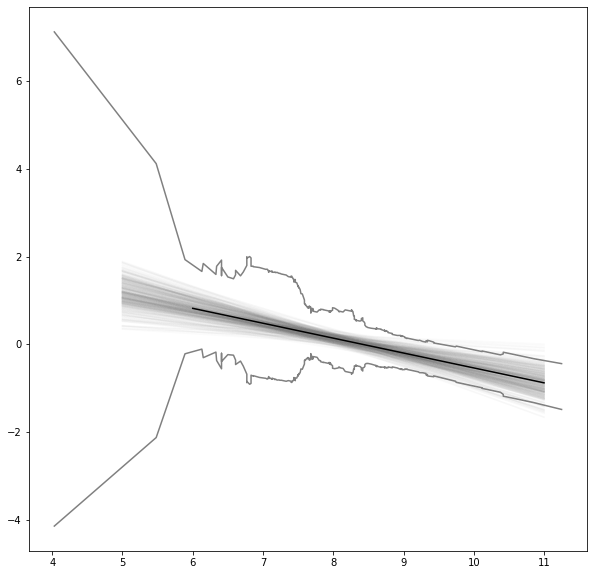

In [32]:
plt.figure(figsize = (10 , 10))
#plt.scatter(limitdf['td_lmass'] , limitdf['ROLL_STD'] , label = 'Rolling std')
#plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
#plt.scatter(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT'], label = 'Rolling MAD to fit')
plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_TOP'], c = 'gray' , label = 'Rolling MAD to fit')
plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BOT'] , c = 'gray' , label = 'Rolling MAD to fit')
#plt.plot(limitdf['td_lmass'] ,(np.mean(lmlimitall.chain['alpha']) + limitdf['td_lmass']*np.mean(lmlimitall.chain['beta'])) - limitdf['ROLL_MAD_FIT_R'] +.5, c = 'blue' , label = 'Rolling MAD to fit')
#plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BETA_NEG'],c = 'blue' , label = 'Rolling MAD to beta < 0')
#plt.scatter(stddf['mean'] , stddf['std'] , label = 'Bin std')
for i in range(0, len(lmlimitall.chain), 25):
    xs = np.arange(5,12)
    ys = lmlimitall.chain[i]['alpha'] + xs * lmlimitall.chain[i]['beta']
    plt.plot(xs, ys, color='gray', alpha=0.03)
plt.plot([6 , 11] , [np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*6 , np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitall.chain['beta']), 2))  )

# # for i in range(0, len(lmlimitbetaneg.chain), 25):
# #     xs = np.arange(5,12)
# #     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
# #     plt.plot(xs, ys, color='blue', alpha=0.03)
# #plt.plot([6 , 11] , [np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*6 , np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitall.chain['beta']), 2))  )
# plt.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
# plt.legend()
# plt.show()
# plt.figure(figsize = (10 , 10))
# #plt.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_STD'] , label = 'Rolling std')
# #plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
# #plt.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT'], label = 'Rolling MAD to fit')
# plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_TOP'], c = 'gray' , label = 'Rolling MAD to fit')
# plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BOT'], c = 'gray' , label = 'Rolling MAD to fit')
# #plt.plot(limitbetanegdf['td_lmass_R'] , limitbetanegdf['ROLL_MAD_FIT_R'] , c = 'gray' , label = 'Rolling MAD to fit')
# #plt.plot(limitbetanegdf['td_lmass'] , (np.mean(lmlimitbetaneg.chain['alpha']) +limitbetanegdf['td_lmass']*np.mean(lmlimitbetaneg.chain['beta'])) - limitbetanegdf['ROLL_MAD_FIT'] , c = 'blue' , label = 'Rolling MAD to fit')
# #plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BETA_NEG'],c = 'blue' , label = 'Rolling MAD to beta < 0')
# #plt.scatter(stddf['mean'] , stddf['std'] , label = 'Bin std')
# # for i in range(0, len(lmlimitbetaneg.chain), 25):
# #     xs = np.arange(5,12)
# #     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
# #     plt.plot(xs, ys, color='gray', alpha=0.03)
# plt.plot([6 , 11] , [np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*6 , np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitbetaneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitbetaneg.chain['beta']), 2))  )

# # for i in range(0, len(lmlimitbetaneg.chain), 25):
# #     xs = np.arange(5,12)
# #     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
# #     plt.plot(xs, ys, color='blue', alpha=0.03)
# #plt.plot([6 , 11] , [np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*6 , np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitbetaneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitbetaneg.chain['beta']), 2))  )
# #plt.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
# plt.legend()
# plt.axis([6.5 , 10.5 , -3 , 3])
# plt.show()

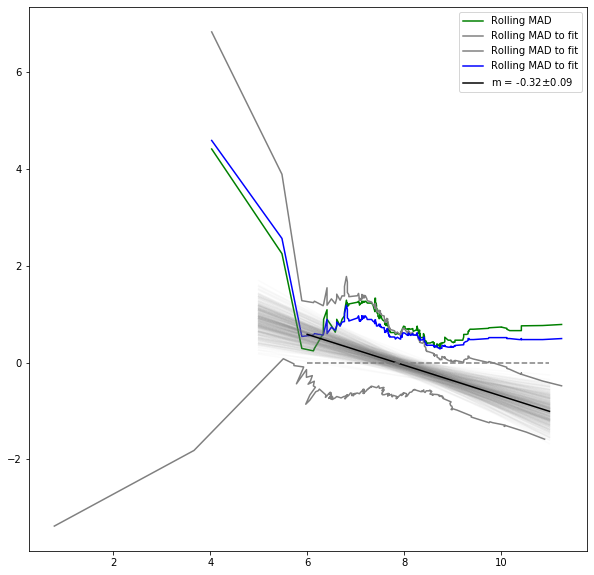

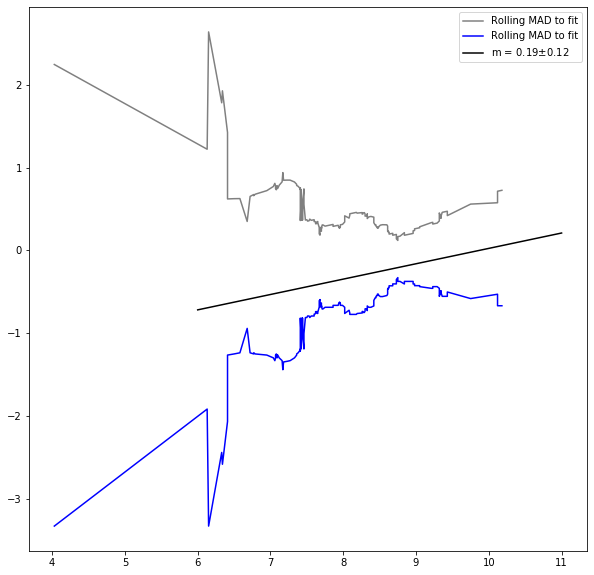

In [208]:
plt.figure(figsize = (10 , 10))
#plt.scatter(limitdf['td_lmass'] , limitdf['ROLL_STD'] , label = 'Rolling std')
plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
#plt.scatter(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT'], label = 'Rolling MAD to fit')
plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT'], c = 'gray' , label = 'Rolling MAD to fit')
plt.plot(limitdf['td_lmass_R'] , limitdf['ROLL_MAD_FIT_R'] , c = 'gray' , label = 'Rolling MAD to fit')
plt.plot(limitdf['td_lmass'] ,(np.mean(lmlimitall.chain['alpha']) + limitdf['td_lmass']*np.mean(lmlimitall.chain['beta'])) - limitdf['ROLL_MAD_FIT_R'] , c = 'blue' , label = 'Rolling MAD to fit')
#plt.plot(limitdf['td_lmass'] , limitdf['ROLL_MAD_FIT_BETA_NEG'],c = 'blue' , label = 'Rolling MAD to beta < 0')
#plt.scatter(stddf['mean'] , stddf['std'] , label = 'Bin std')
for i in range(0, len(lmlimitall.chain), 25):
    xs = np.arange(5,12)
    ys = lmlimitall.chain[i]['alpha'] + xs * lmlimitall.chain[i]['beta']
    plt.plot(xs, ys, color='gray', alpha=0.03)
plt.plot([6 , 11] , [np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*6 , np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitall.chain['beta']), 2))  )

# for i in range(0, len(lmlimitbetaneg.chain), 25):
#     xs = np.arange(5,12)
#     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
#     plt.plot(xs, ys, color='blue', alpha=0.03)
#plt.plot([6 , 11] , [np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*6 , np.mean(lmlimitall.chain['alpha']) + np.mean(lmlimitall.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitall.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitall.chain['beta']), 2))  )
plt.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
plt.legend()
plt.show()

plt.figure(figsize = (10 , 10))
#plt.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_STD'] , label = 'Rolling std')
#plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD'] , c = 'green' , label = 'Rolling MAD')
#plt.scatter(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT'], label = 'Rolling MAD to fit')
plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT'], c = 'gray' , label = 'Rolling MAD to fit')
#plt.plot(limitbetanegdf['td_lmass_R'] , limitbetanegdf['ROLL_MAD_FIT_R'] , c = 'gray' , label = 'Rolling MAD to fit')
plt.plot(limitbetanegdf['td_lmass'] , (np.mean(lmlimitbetaneg.chain['alpha']) +limitbetanegdf['td_lmass']*np.mean(lmlimitbetaneg.chain['beta'])) - limitbetanegdf['ROLL_MAD_FIT'] , c = 'blue' , label = 'Rolling MAD to fit')
#plt.plot(limitbetanegdf['td_lmass'] , limitbetanegdf['ROLL_MAD_FIT_BETA_NEG'],c = 'blue' , label = 'Rolling MAD to beta < 0')
#plt.scatter(stddf['mean'] , stddf['std'] , label = 'Bin std')
# for i in range(0, len(lmlimitbetaneg.chain), 25):
#     xs = np.arange(5,12)
#     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
#     plt.plot(xs, ys, color='gray', alpha=0.03)
plt.plot([6 , 11] , [np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*6 , np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitbetaneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitbetaneg.chain['beta']), 2))  )

# for i in range(0, len(lmlimitbetaneg.chain), 25):
#     xs = np.arange(5,12)
#     ys = lmlimitbetaneg.chain[i]['alpha'] + xs * lmlimitbetaneg.chain[i]['beta']
#     plt.plot(xs, ys, color='blue', alpha=0.03)
#plt.plot([6 , 11] , [np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*6 , np.mean(lmlimitbetaneg.chain['alpha']) + np.mean(lmlimitbetaneg.chain['beta'])*11] , c = 'black' , label = 'm = ' + str(round(np.mean(lmlimitbetaneg.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmlimitbetaneg.chain['beta']), 2))  )
#plt.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
plt.legend()
plt.show()

In [28]:
limitdf.to_csv('limitdf.csv' , index = False)
limitbetanegdf.to_csv('limitbetanegdf.csv' , index = False)

In [25]:
limitdf['PAB_SFR_EX2'][limitdf.MASS_BINS == 0].std(axis = 0)

2.2909078594794003

In [34]:
stdarray = []
for i in range(0 , 31):
    stdarray.append((limitdf['td_lmass'][limitdf.MASS_BINS == i].mean(axis = 0) , limitdf['PAB_SFR_EX2'][limitdf.MASS_BINS == i].std(axis = 0)))

In [35]:
stddf = pd.DataFrame(stdarray , columns = ['mean' , 'std'])

In [113]:
#display(stddf)

In [145]:
stddf.to_csv('stddf.csv' , index = False)